# 1. Geo Data

## 개념

지도 데이터를 다루기 앞서, 지도 데이터란 무엇이고 어떤 형태로 생겼는지 살펴보려 합니다.  
지도 데이터는 일반적으로 **'위치' 정보를 담고 있는 데이터**입니다.  
이 위치는 좌표계에 따라 다르게 정의될 수 있지만, 일반적으로는 시각화에는 WSG84 좌표계(EPSG 4326 이라고도 합니다)를 씁니다.  
한편, 점과 점 사이의 거리 등 공간 연산에는 WSG84 가 아닌 다른 좌표계를 씁니다.  
이처럼 목적에 따라 좌표계가 달라질 수 있습니다.

> 좌표계 종류와 구분은 아래 링크에서 확인해보세요.  
> https://www.osgeo.kr/17

한편, 각 좌표계에서 한 지점을 점, Point 라고 합니다. 이 점은 좌표계에서 (x, y) 로 표현됩니다.  
WSG84 에서는 (경도, 위도)로 주로 표현되고 영어로는 (longitude, latitude) 라고도 합니다.  
한가지 주의해야할 점은, 우리나라에서는 (위도, 경도) 순으로 표시하는게 많은데, 영어권에서는 (경도, 위도) 순으로 주로 표현됩니다.  
즉, `x = longitude` , `y = latitude` 인 경우가 많습니다.

## 형태

지도 데이터는 여러 포맷이 있지만, 다음과 같이 크게 2가지가 유명합니다.  
아마 지도 데이터를 찾다시면 이 두 개의 형태가 제일 많이 보일겁니다.

- Shape file (.shp)
- Geojson (.geojson)

하나씩 간단히 살펴보겠습니다.

### Shape File

Shape File 은 일반적으로 다음과 같이 5개의 파일의 묶음을 말합니다.

```
.shp : 지리 사상의 기하학 정보를 저장
.shx : .shp 파일의 인덱스를 저장
.dbf : 지라 사상의 속석 정보를 제공하는 dBase 파일
.sbn : 지리 사상 공간의 인덱스를 저장하는 파일
.sbx : join 기능 수행 및 shape 필드에 대한 인덱스 생성에 필요한 파일
```

웹 상에서, 어떤 .shp 파일 압축파일을 다운받으면 위와 같이 구성되어 있을 겁니다.  
각 구성 내용에 대해서 지금 당장 구체적으로 알 필요는 없습니다.  

이 파일 묶음을 여는 법은, .shp 파일만 열면 나머지 파일이 알아서 로딩됩니다.  
이 중 하나라도 빠지면 파일이 제대로 오픈되지 않습니다.

### GeoJson

GeoJson 은 Shape File과 달리 그냥 하나의 파일입니다.  
또, 일반 데이터 포맷으로 유명한 Json 포맷을 따릅니다.  
예를 들어 하나의 점을 데이터로 표현하면 다음과 같이 구성되어 있습니다.

```
{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [125.6, 10.1]
  },
  "properties": {
    "name": "Dinagat Islands"
  }
}
```

`type` 부분에 기하학 Type 이 들어가는데, 다음과 같은 형태들이 이미 정의되어있습니다.
- Point
- LineString
- Polygon
- MultiPoint
- MultiLineString
- MultiPolygon

`coordinates` 에는 말 그대로 좌표 값이 들어갑니다.  
위의 경우, `Point` 형태이기 때문에, 하나의 좌표값이 들어갔습니다.
만약, LineString 형태였다면 2개의 좌표값이 들어갈 것이고,
Polygon 형태라면, 2개 이상의 좌표값이 들어갈 것 입니다.

모든 도형은 점을 기반으로 만들어지기 때문에, Point 외의 도형들은 점을 이어나가는 형태라고 생각하면 됩니다.

`properties` 에는 해당하는 지도 데이터, (여기서는 한 점이 되겠네요) 의 속성 정보를 담습니다. 이 속성은 사용자가 부여하기 나름입니다. 여기서는 name 이라는 속성을 주었네요.

일반적으로 지도 데이터는 여러 개의 데이터 정보를 담습니다.  
하나의 점이 아니라, 여러 개의 데이터를 담는다고 할 때, GeoJson은 다음과 같은 형태를 띕니다.

```
{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "geometry": {
        "type": "Point",
        "coordinates": [102.0, 0.5]
      },
      "properties": {
        "prop0": "value0"
      }
    },
    {
      "type": "Feature",
      "geometry": {
        "type": "LineString",
        "coordinates": [
          [102.0, 0.0], [103.0, 1.0], [104.0, 0.0], [105.0, 1.0]
        ]
      },
      "properties": {
        "prop0": "value0",
        "prop1": 0.0
      }
    },
    {
      "type": "Feature",
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [100.0, 0.0], [101.0, 0.0], [101.0, 1.0],
            [100.0, 1.0], [100.0, 0.0]
          ]
        ]
      },
      "properties": {
        "prop0": "value0",
        "prop1": { "this": "that" }
      }
    }
  ]
}
```

`type: FeatureCollection` 이 추가되었고,  
`features` 안에 list 형태로 각 데이터 객체를 담는 꼴입니다.  
즉, 지도 데이터를 기존 GeoJson 에 추가하고 싶으면 `features` 가 가르키는 리스트 안에 `dict` 형태로 추가해주시면 됩니다.

### Shape File vs GeoJson

- Shape File 은 QGIS 나 Geopandas 같이 전용 프로그램이 아니면, 파일 그 자체가 어떻게 생겨먹었는지 알 수가 없습니다. 하지만 GeoJson은 파일 내용을 사람이 해석가능합니다.
- 반면, GeoJson 은 그만큼 Shape File 보다 용량이 큽니다. 따라서 매우 큰 데이터를 다루기에는 적합하지 않습니다.

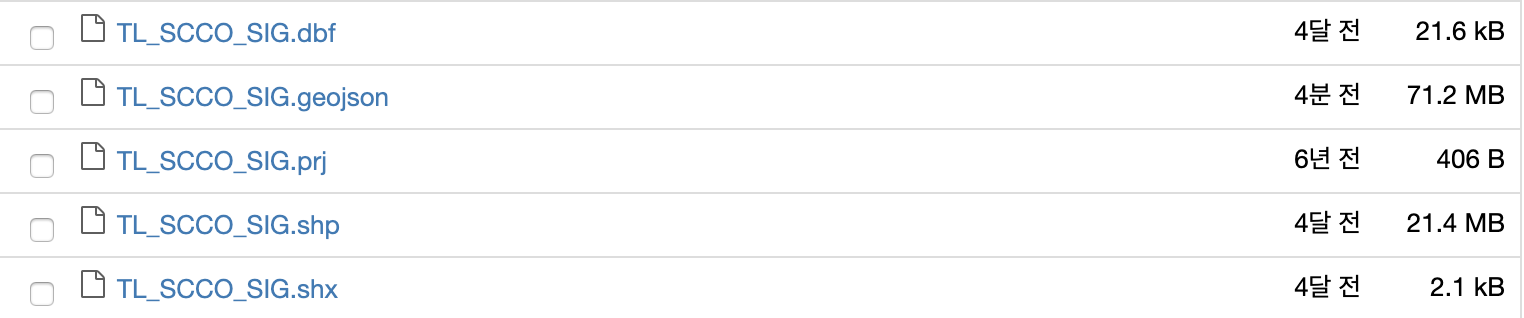

- 두 개를 간단히 비교한 테이블로 마무리합니다.


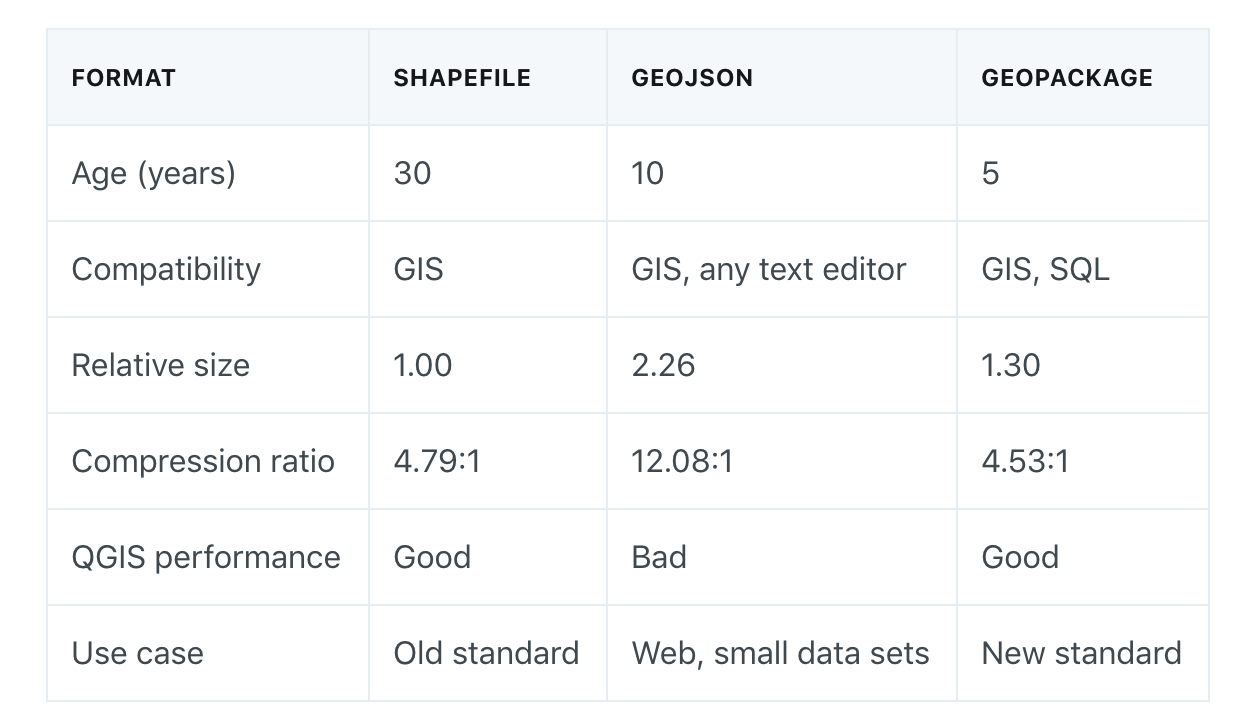

https://feed.terramonitor.com/shapefile-vs-geopackage-vs-geojson/

# 2. 파이썬에서 불러오는 방법

크게 다음과 같이 2가지 방법이 있습니다.

- geopandas 사용
- fiona 사용

## geopandas 사용

geopandas 는 기존 pandas 와 거의 유사합니다. 다만 Geometry 형태를 지원해준다는 점에서 차이가 있습니다.  
예를 들어 아래와 같이 불러올 수 있습니다.

In [11]:
import geopandas as gpd

df = gpd.read_file('data/TL_SCCO_SIG.shp', encoding='cp949')
df.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.4532424484 1953567.198968612,..."
1,11140,Jung-gu,중구,"POLYGON ((957890.3856818088 1952616.745568171,..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.7610894071 1950834.083634671,..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109391748 1952649.604797923, ..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.0824756651 1952633.249520781,..."


geojson 파일도 같은 방법으로 불러올 수 있습니다.

In [ ]:
df = gpd.read_file('data/TL_SCCO_SIG.geojson')

지도 데이터를 사용할 건데 Pandas 처럼 사용하고 싶다고 하시면 이걸 사용하면 됩니다. Pandas 의 여러 기능 덕분에 분석하기 매우 용이하지만, 그만큼 메모리를 많이 잡아먹는다는 단점이 있습니다. (이는 Pandas 자체 문제기도 합니다. 애초에 매우 큰 용량의 데이터는 Pandas 를 못씁니다.)

## fiona 사용

fiona 는 `dict` 형태로 데이터를 다룹니다.  
먼저 아래와 같이 파일을 열 수 있습니다.  

In [27]:
import fiona

# shape file, geojson 모두 지원합니다.
f = fiona.open('data/TL_SCCO_SIG.shp')
f

<open Collection 'data/TL_SCCO_SIG.geojson:TL_SCCO_SIG', mode 'r' at 0x1306f0860>

보면, f 는 fiona.collection 타입으로, 일종의 파일 스트림입니다.  
아래와 같이 인덱스 단위로 각 데이터에 접근할 수 있습니다.

In [ ]:
f[0]

In [ ]:
{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([
  ('SIG_CD', '11110'),
  ('SIG_ENG_NM', 'Jongno-gu'),
  ('SIG_KOR_NM', 'Á¾·Î±¸')]),
 'geometry': {
  'type': 'Polygon',
  'coordinates': [[
   (956615.4532424484, 1953567.1989686124),
   (956621.5787365452, 1953565.2711694315),
   (956626.2441302694, 1953564.3527459917),
   (956638.7900103405, 1953562.1929530296),
   ...
   ]]
 }
}

모든 데이터를 한 리스트에 다 담고싶다면, 아래와 같이 코딩하면 됩니다.

In [22]:
with fiona.open('data/TL_SCCO_SIG.shp') as f:
    item_list = [item for item in f]

fiona 가 geopandas 보다 덜 직관적이고 어려워보일 수 있습니다.  
다만, geopandas 는 한 번에 데이터를 로드하므로 조금 느리고 메모리를 한 번에 쓰는 반면, fiona 는 파일스트림으로 접근하므로 속도도 빠르고, 메모리를 접근할 때 마다 사용합니다. 따라서 대용량 데이터 작업에는 fiona 가 더 적합할 수 있습니다.

# 3. 정리

이 포스팅에서는 단순히 데이터를 불러오는 것만 했지만, 사실 이 외에 공간연산, 데이터 조작 등의 연산 등도 geopandas 나 fiona 를 통해서 할 수 있습니다. 이 부분은 별도로 포스팅 하겠습니다.

자 이제 지도 데이터에 대해서 알았고, 파이썬에서 어떻게 사용하는지도 알았습니다.  
이제 본격적으로 각 지도 데이터를 시각화 하는 방법에 대해 다음 포스팅부터 살펴보겠습니다.

# 4. 참고

- https://likedalhyang.tistory.com/43
